# Aerial Cactus Id Comp

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = Config.data_path()/ 'AerialCactus'
#path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/AerialCactus')

## Getting the Data from Kaggle

In [4]:
#! kaggle competitions download -c aerial-cactus-identification -p {path}

In [5]:
#! unzip -q -n {path}/train.zip -d {path}
#! unzip -q -n {path}/test.zip -d {path}


In [6]:
df_train = pd.read_csv(path/'train.csv')
#df_train.head()

## Loading in Data

In [5]:
tfms = get_transforms(flip_vert=True)


In [7]:
?? get_transforms

In [6]:
src = (ImageList.from_csv(path, 'train.csv', folder='train')
                 .split_by_rand_pct(0.2)
                 .label_from_df())
data =          (src.transform(tfms, size=16)
                 .add_test_folder('test')
                 .databunch().normalize(imagenet_stats) )

In [7]:
#data.show_batch(rows = 3, size = (7,6))

## Creating and Training a model 

In [8]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy )

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.357283,0.271261,0.890286,00:08
1,0.241986,0.171896,0.930857,00:08
2,0.212432,0.147447,0.941143,00:08
3,0.188152,0.140474,0.946286,00:08


In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


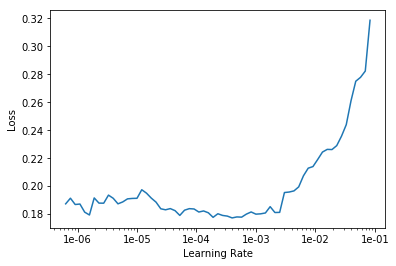

In [15]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.049032,0.042120,0.984000,00:12
1,0.061752,0.050960,0.979143,00:11
2,0.072646,0.050031,0.982571,00:11
3,0.064995,0.057849,0.983143,00:11
4,0.062095,0.044915,0.982286,00:11
5,0.040470,0.030220,0.990000,00:11
6,0.041271,0.031187,0.989143,00:11
7,0.033894,0.029032,0.990286,00:12


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


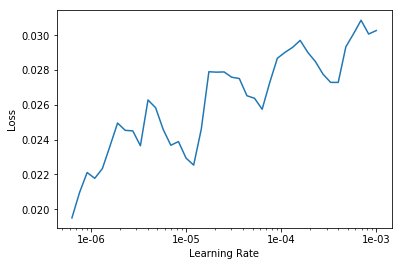

In [19]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.035484,0.027525,0.990286,00:11
1,0.036864,0.026836,0.991143,00:11
2,0.029393,0.027737,0.990571,00:11
3,0.034428,0.025910,0.990571,00:11


In [22]:
learn.unfreeze()


In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


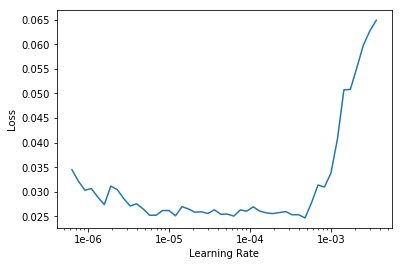

In [24]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.035168,0.026299,0.990571,00:12
1,0.033477,0.026339,0.990571,00:12
2,0.030585,0.025375,0.990571,00:11
3,0.028298,0.025906,0.990000,00:11


In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


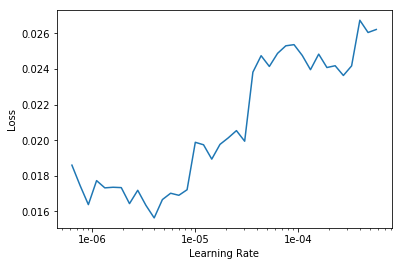

In [29]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(4, max_lr = slice(1e-4/5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.032324,0.025630,0.990857,00:11
1,0.029159,0.027806,0.990286,00:11
2,0.033450,0.026886,0.991143,00:11
3,0.029236,0.026772,0.990000,00:11


In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


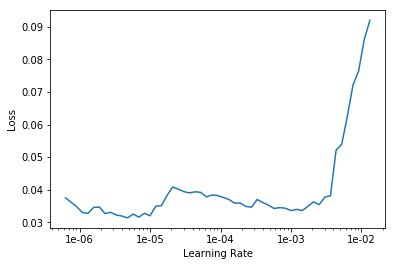

In [37]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(4, max_lr = slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.034933,0.030732,0.988571,00:11
1,0.046961,0.029223,0.989714,00:11
2,0.039652,0.027428,0.991429,00:11
3,0.031172,0.025339,0.991143,00:11


In [50]:
learn.freeze()

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


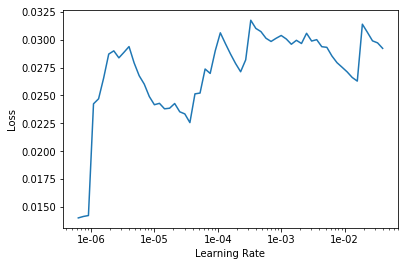

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(4, max_lr= slice(1e-5/5,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.029466,0.023790,0.992286,00:08
1,0.028243,0.023435,0.992571,00:08
2,0.029157,0.024193,0.991714,00:08
3,0.026156,0.023572,0.991714,00:08


In [57]:
learn.save('stage-1')

In [58]:
data = (src.transform(tfms, size=32)
        .databunch().normalize(imagenet_stats))

learn.data = data

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.094779,0.059584,0.976571,00:09
1,0.057245,0.034519,0.989429,00:08
2,0.037514,0.028941,0.989714,00:08
3,0.040391,0.029408,0.989429,00:08


In [60]:
learn.unfreeze()

In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


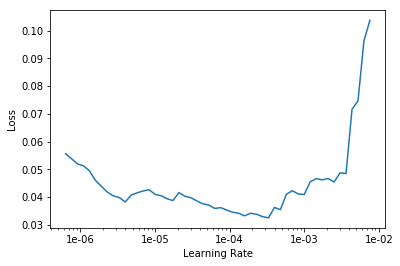

In [62]:
learn.recorder.plot()

In [65]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.022341,0.016919,0.992857,00:12
1,0.019891,0.016414,0.994571,00:12
2,0.022543,0.016107,0.993714,00:12
3,0.022827,0.014848,0.994571,00:12
4,0.020127,0.014771,0.994286,00:12
5,0.020210,0.013542,0.994286,00:12
6,0.016318,0.014273,0.994286,00:12
7,0.016766,0.015624,0.993429,00:12


In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


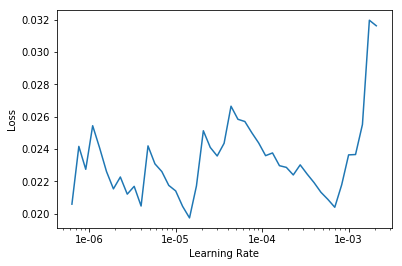

In [67]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(4, max_lr = slice(1e-4/5,1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.025022,0.013003,0.994000,00:12
1,0.016866,0.023115,0.989429,00:12
2,0.014168,0.013252,0.995429,00:12
3,0.013503,0.012800,0.995714,00:12


In [69]:
learn.save('stage-2')

In [70]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


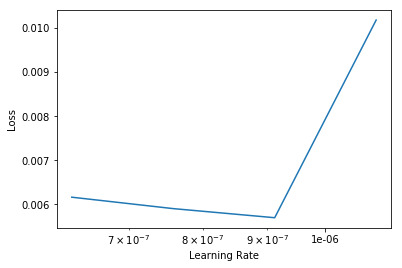

In [71]:
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(4, max_lr =slice(7e-7,9e-7))

epoch,train_loss,valid_loss,accuracy,time
0,0.010580,0.011261,0.995714,00:12
1,0.012290,0.011235,0.996000,00:12
2,0.011360,0.012245,0.995143,00:12
3,0.012793,0.012949,0.994857,00:12


In [77]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.014384,0.011381,0.995143,00:08
1,0.014181,0.014596,0.993714,00:08
2,0.016994,0.012827,0.994286,00:08
3,0.017030,0.064029,0.994286,00:08


In [78]:
learn.freeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.015684,0.011011,0.996000,00:08
1,0.019093,0.014502,0.994000,00:08
2,0.010311,0.010329,0.995429,00:08
3,0.009357,0.010825,0.995714,00:08


In [82]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.012350,0.011588,0.994571,00:08
1,0.013257,0.010873,0.995429,00:08
2,0.008684,0.453531,0.992286,00:08
3,0.007513,0.441817,0.992571,00:08


In [85]:
learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


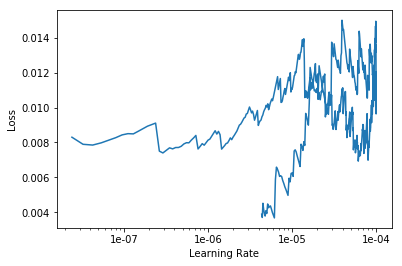

In [89]:
learn.recorder.plot()

In [88]:
learn.fit_one_cycle(4,max_lr = slice(1e-4/5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.011534,0.247484,0.992571,00:08
1,0.007787,0.049706,0.993714,00:08
2,0.010151,0.010926,0.995714,00:08
3,0.008105,1.195883,0.990571,00:09


In [90]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


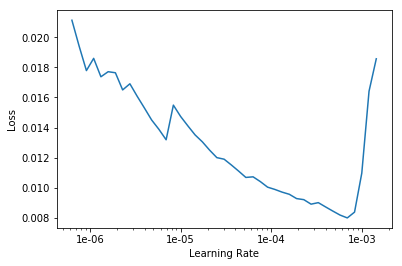

In [91]:
learn.recorder.plot()

In [92]:
learn.fit_one_cycle(4,max_lr = slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.009547,0.507598,0.992571,00:12
1,0.016935,1.526829,0.988286,00:12
2,0.014439,0.096752,0.994000,00:12
3,0.008756,0.435084,0.994286,00:12


In [93]:
learn.freeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.011524,0.011103,0.995714,00:08
1,0.009552,1.963145,0.991429,00:08
2,0.010317,0.729466,0.993143,00:08
3,0.011787,1.669949,0.991143,00:08


In [96]:
learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [60]:
preds, _ = learn.load('stage-2').get_preds(ds_type=DatasetType.Test)
predictions = np.argmax(preds, axis = 1)

In [65]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [70]:
submission = pd.DataFrame({
    "Id":fnames,
    "has_cactus": predictions
})
submission.to_csv(path/'submission1.csv', index=False)